In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from sklearn.metrics import r2_score

In [3]:
DATA_FILE = "../Movie_Budget_and_Box_Office.csv"

In [4]:
data = pd.read_csv(DATA_FILE)
data.head()

,Movie,Month,Day,Release Year,Budget($M),Domestic Gross($M),Worldwide Gross($M)
0,Avatar,Dec,18,2009,425.0,760.507625,2783.918982
1,Star Wars Ep. VII: The Force Awakens,Dec,18,2015,306.0,936.662225,2058.662225
2,Pirates of the Caribbean: At World's End,May,24,2007,300.0,309.420425,963.420425
3,Spectre,Nov,6,2015,300.0,200.074175,879.620923
4,The Dark Knight Rises,Jul,20,2012,275.0,448.139099,1084.439099


In [5]:
budget = data['Budget($M)'].reshape([-1,1])
WorldwideGross = data['Worldwide Gross($M)'].reshape([-1,1])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


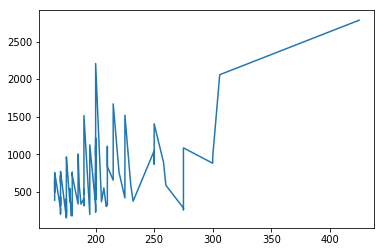

In [6]:
plt.plot(budget[:100], WorldwideGross[:100])

In [7]:
linearReg = linear_model.LinearRegression()
linearReg.fit(budget, WorldwideGross)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
prediction=linearReg.predict(np.sort(budget, axis=0))

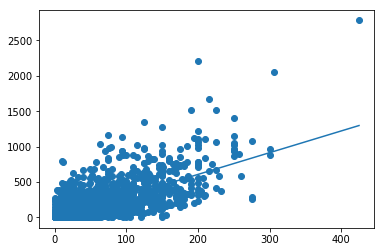

In [9]:
plt.scatter(budget, WorldwideGross)
plt.plot(np.sort(budget, axis=0),prediction)

In [18]:
r2 = r2_score(WorldwideGross, prediction)
coef = linearReg.coef_
print("coef:", coef)
constant = linearReg.intercept_

coef: [[3.06906247]]


In [19]:
r2

-1.0105964387625166

In [20]:
r = WorldwideGross/budget

In [21]:
# fit on all data 
stats.ttest_1samp(r, coef)

Ttest_1sampResult(statistic=array([[4.28605682]]), pvalue=array([[1.85147028e-05]]))

In [22]:
# since p value is significantly less than coef, therefore reject Ho. 

In [23]:
df = len(r)-1
print("df:", df)

df: 5221


In [28]:
##########

In [30]:
# top 100 movies 
linearReg.fit(budget[:100], WorldwideGross[:100])
coef = linearReg.coef_
r = WorldwideGross[:100]/budget[:100]
df = len(r-1)
print("df:", df)
print(stats.ttest_1samp(r, coef))

df: 100
Ttest_1sampResult(statistic=array([[-16.78333397]]), pvalue=array([[1.03069779e-30]]))


In [69]:
# since p value is significantly less than alpha, reject Ho.  

In [31]:
# bottom 100 movies
linearReg.fit(budget[-100:], WorldwideGross[-100:])
coef = linearReg.coef_
r = WorldwideGross[-100:]/budget[-100:]
df = len(r-1)
print("df:", df)
print(stats.ttest_1samp(r, coef))

df: 100
Ttest_1sampResult(statistic=array([[0.14159829]]), pvalue=array([[0.88768506]]))


In [ ]:
# since p value is larger than alpha, fail to reject Ho. Meaning that this rule applies to the movies that has a low rating